In [4]:
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

<ipython-input-4-6b6b9e931396>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [5]:
x = [0, 1, 2, 3, 4, 5]
y = [1, 3, 3, 5, 2, 2]

f = interp1d(x, y)
x_lin = np.linspace(0,5,100)
y_lin = f(x_lin)

y_ask = f(3.1)
print (y_ask)

4.699999999999999


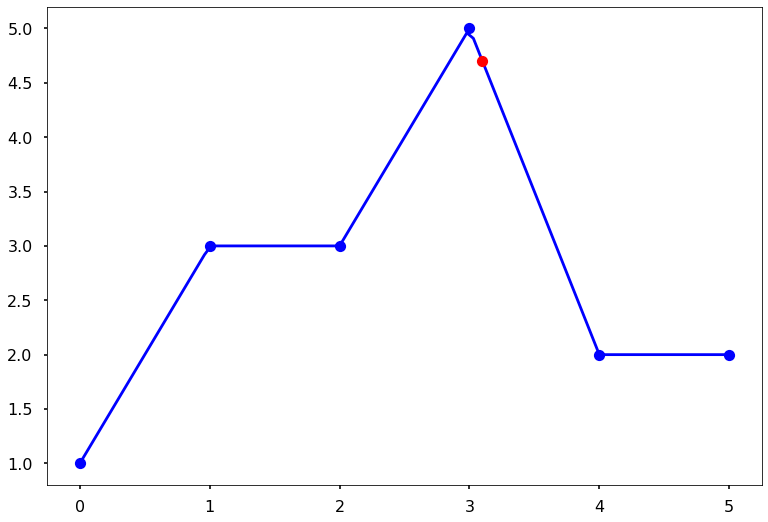

In [6]:
plt.plot(x,y,'ob')
plt.plot(x_lin, y_lin, 'b')
plt.plot(3.1,f(3.1),'ro')
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline
def divided_diff(x,y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
            (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial
    at x
    '''
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1, n+1):
        p = coef[n-k] + (x - x_data[n-k])*p
    return p

<ipython-input-7-44007244a63a>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


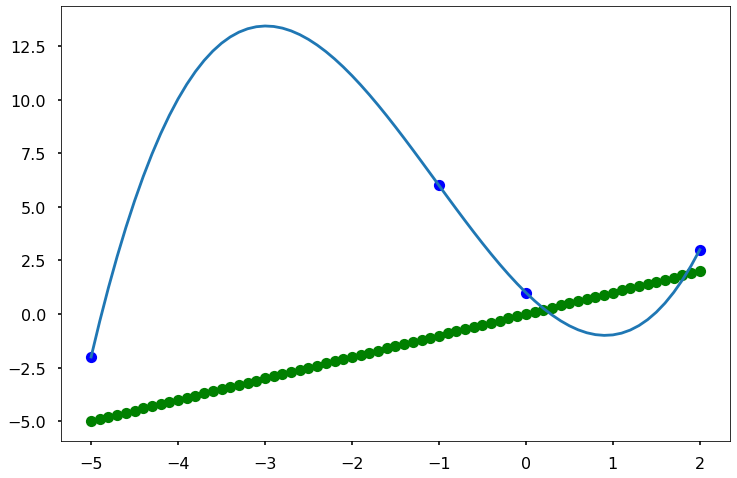

In [8]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])

# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

#evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)


plt.figure(figsize = (12, 8))
plt.plot(x,y,'bo')
plt.plot(x_new, x_new, 'go')
plt.plot(x_new, y_new)

In [9]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

#generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x*np.random.random(len(x))

#assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

#turn y into a column vector
y = y[:, np.newaxis]

# Direct least square progression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[1.4320092 ]
 [1.02758894]]


<ipython-input-9-6712724517a1>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


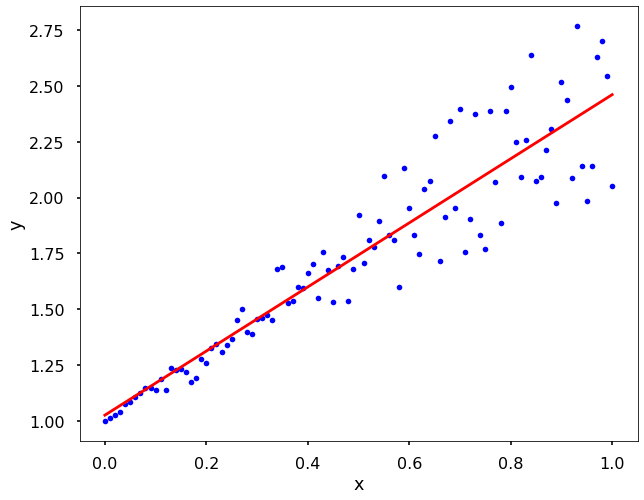

In [10]:
#plot the result
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[1.4320092 ]
 [1.02758894]]


In [12]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

[[1.4320092 ]
 [1.02758894]]


[1.49695731 0.98668177]


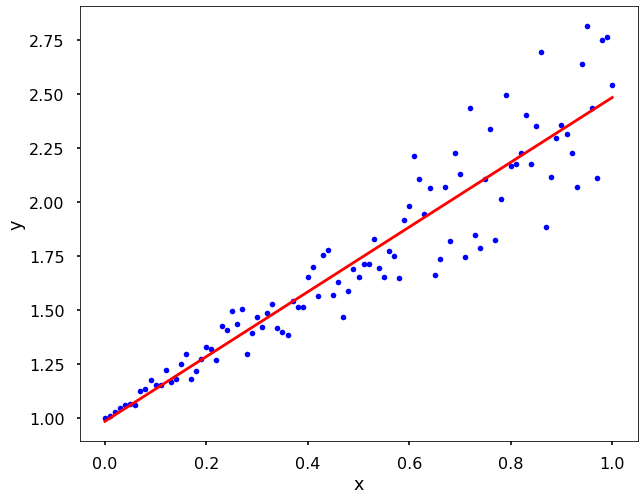

In [13]:
# generate x and y
x = np.linspace (0,1,101)
y = 1 + x + x*np.random.random(len(x))

def func(x, a, b):
  y = a*x + b
  return y

alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(alpha)

# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [14]:
x = [0, 1, 2, 3, 4, 5]
y = [1, 3, 3, 5, 2, 2]

In [15]:
f = CubicSpline(x,y,bc_type='natural')

x_cub = np.linspace(0,5,100)
y_cub = f(x_cub)

y_ask = f(2.9)
print(y_ask)

5.000368421052631


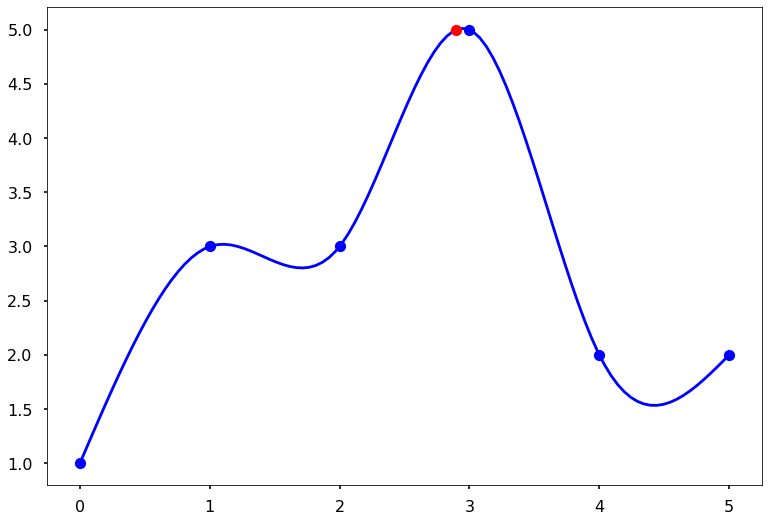

In [17]:
plt.plot(x,y,'bo')
plt.plot(x_cub,y_cub,'b')
plt.plot(2.9,f(2.9),'ro')
plt.show()